In [46]:
import re
from text_to_num import text2num


def parseResults(file):
    # Example:
    # sol/enum/log_centSommets.txt.txt:Result: best solution found in 60.00 seconds with cost: inf.
    # sol/enum/log_cinqCentSommets.txt.txt:Result: best solution found in 60.03 seconds with cost: inf.
    # sol/enum/log_cinqSommets.txt.txt:Result: best solution found in 0.00 seconds with cost: 4.
    # ...

    # save the name of the instance, the time and the cost in a list
    results = list()
    for line in open(file, "r").readlines():
        if "Result" in line:
            algo = line.split("/")[1]

            instance = line.split(":")[0].removeprefix("sol/" + algo + "/log_").removesuffix("Sommets.txt")
            # split by upper case letter
            instance = re.split("(?<!^)(?=[A-Z])", instance)
            # lowercase the letter of each word
            instance = [word.lower() for word in instance]
            # join the words
            instance = "-".join(instance)

            # special cases...
            if instance == "cinq-cent":
                instance = "cinq cent"
            if instance == "dix-mille":
                instance = "dix mille"
            if instance == "vingt-etun":
                instance = "vingt et un"

            # text to number
            instance = text2num(instance, "fr")

            time = float(line.split(":")[2].split(" ")[5])
            cost = line.split(":")[3].removeprefix(" ").removesuffix(".\n")

            results.append([instance, time, cost])

            #sort the results by instance
            results.sort(key=lambda x: x[0])

    return results

In [47]:
enumResults = parseResults("sol/enum/results.csv")
gradientResults = parseResults("sol/gradient/results.csv")

In [50]:
# print the results in a table
print("\n\n\n")
print("Enum:")
print("\n".join(["{:<20} {:<20} {:<20}".format(x[0], x[1], x[2]) for x in enumResults]))
print("\n\n\n")
print("Gradient:")
print("\n".join(["{:<20} {:<20} {:<20}".format(x[0], x[1], x[2]) for x in gradientResults]))
print("\n\n\n")






Enum:
4                    0.0                  2                   
5                    0.0                  4                   
10                   0.01                 13                  
15                   0.74                 43                  
17                   3.47                 60                  
20                   17.13                40                  
21                   60.0                 107                 
22                   60.0                 103                 
23                   60.0                 116                 
24                   60.01                131                 
25                   60.0                 152                 
30                   60.0                 190                 
50                   60.0                 inf                 
100                  60.0                 inf                 
500                  60.02                inf                 
1000                 60.06                inf

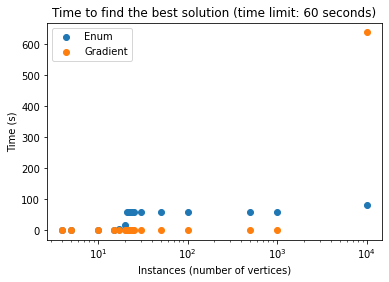

In [49]:
# from matplotlib import pyplot as plt

# # plot the enum results and the gradient results,
# # where X is the instance (number of vertices) and Y is the time in seconds,
# # the X axis is logarithmic and the Y axis is linear
# plt.scatter([x[0] for x in enumResults], [x[1] for x in enumResults], label="Enum")
# plt.scatter([x[0] for x in gradientResults], [x[1] for x in gradientResults], label="Gradient")
# plt.legend()
# plt.xscale("log")
# plt.xlabel("Instances (number of vertices)")
# plt.ylabel("Time (s)")
# plt.title("Time to find the best solution (time limit: 60 seconds)")
# plt.show()